In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm

C:\Users\WeiZhong\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
c = pd.read_csv(r"household.csv", quotechar="'", na_values=['N', 'M'], header=0, prefix='c')

In [4]:
d = c[(c.OMB13CBSA == 14460) & (c.RENT > 0)]

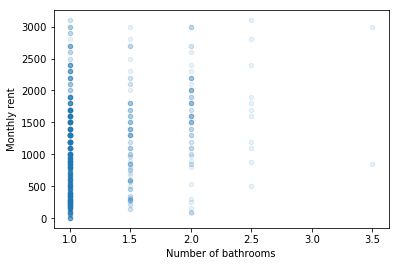

In [81]:
c[(c.OMB13CBSA == "'14460'") & (c.RENT > 0) & (c.RENT < 5000) & (c.intbaths > 0)].plot(kind='scatter', x='intbaths', y='RENT', alpha=0.1)
plt.ylabel('Monthly rent')
plt.xlabel('Number of bathrooms')
plt.show()

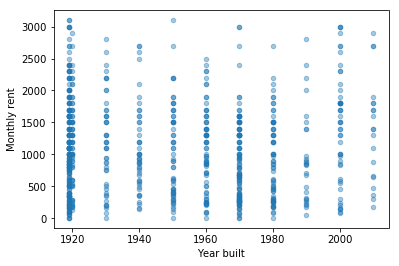

In [90]:
c[(c.OMB13CBSA == "'14460'") & (c.RENT > 0) & (c.RENT < 5000)].plot(kind='scatter', x='YRBUILT', y='RENT', alpha=0.4)
plt.ylabel('Monthly rent')
plt.xlabel('Year built')
plt.show()

In [89]:
from statsmodels.formula.api import ols
mod = ols("RENT ~ YRBUILT", data=c)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   RENT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5796
Date:                Fri, 17 Nov 2017   Prob (F-statistic):              0.446
Time:                        15:40:51   Log-Likelihood:            -5.5662e+05
No. Observations:               69493   AIC:                         1.113e+06
Df Residuals:                   69491   BIC:                         1.113e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    541.9588    213.691      2.536      0.0

In [27]:
c.intbaths.hist()

In [5]:
def bathroomint(nums):
    if (nums == 7) | (nums == 8) | (nums == 11) | (nums == 12):
        return 0.5
    elif (nums == 1) | (nums == 9):
        return 1
    elif nums == 2:
        return 1.5
    elif nums == 3:
        return 2
    elif nums == 4:
        return 2.5
    elif nums == 5:
        return 3
    elif nums == 6:
        return 3.5
    else:
        return 0
d['intbaths'] = d.BATHROOMS.apply(bathroomint)

C:\Users\WeiZhong\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
c['intrent'] = c.RENT.apply(lambda num: int(num[1:-1]) if int(num[1:-1]) > 0 else 0)

TypeError: 'int' object is not subscriptable

In [32]:
c.BATHROOMS[0][1:-1]

'02'

In [3]:
import geocoder
g = geocoder.google('25 Chester St, Allston MA')
g.latlng

[42.3516966, -71.1284239]

----

In [49]:
np.linspace(0,5500,12)

array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
        4000.,  4500.,  5000.,  5500.])

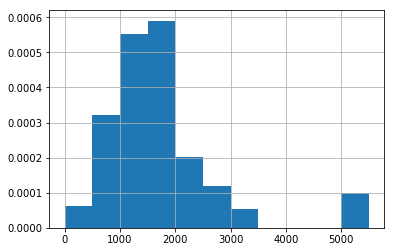

In [50]:
d[d.SEARCHNET==1].RENT.hist(weights=d[d.SEARCHNET==1].WEIGHT, bins=np.linspace(0,5500,12), normed=True)
plt.show()

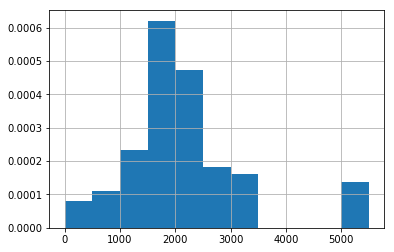

In [51]:
d[d.SEARCHREA==1].RENT.hist(weights=d[d.SEARCHREA==1].WEIGHT, bins=np.linspace(0,5500,12), normed=True)
plt.show()

In [58]:
d['rentperperson'] = d.RENT/d.NUMPEOPLE

C:\Users\WeiZhong\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


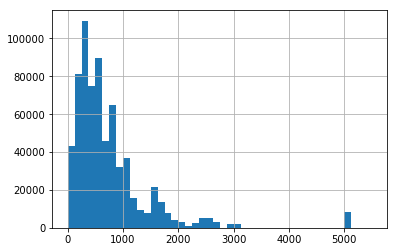

In [64]:
d.rentperperson.hist(bins=np.linspace(0,5500,45), weights=d.WEIGHT)
plt.show()

In [74]:
d[['TOTROOMS', 'RENT']].values

array([[   5,  550],
       [   3, 1100],
       [   5, 1500],
       ..., 
       [   4,  280],
       [   5,  100],
       [   5,  410]], dtype=int64)

In [80]:
sns.reset_orig()

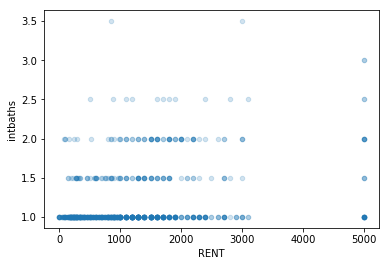

In [93]:
d.plot.scatter('RENT', 'intbaths', alpha=0.2)
plt.show()

In [144]:
ols("RENT ~ BEDROOMS + intbaths", data=d, weights=d.WEIGHT).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RENT   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.883e+05
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        17:19:43   Log-Likelihood:                -6930.0
No. Observations:                 840   AIC:                         1.387e+04
Df Residuals:                     837   BIC:                         1.388e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    195.2204    109.794      1.778      0.076       -20.284   410.725
BEDROOMS     173.7803     36.107      4.813      0.000       102.910   244.651
intbaths     588.6804     89.765      6.558      0.000       412.490   764.871
==============================================================================
Omnibus:                      321.283   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1268.664
Skew:                           1.791   Prob(JB):                    3.26e-276
Kurtosis:                       7.839   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
d.intbaths.value_counts()

1.0    655
1.5     94
2.0     74
2.5     13
3.5      2
3.0      2
Name: intbaths, dtype: int64

In [121]:
d.PORCH.value_counts()

1    445
2    395
Name: PORCH, dtype: int64

In [7]:
d['intporch'] = 2 - d.PORCH
d['hascentralair'] = d.ACPRIMARY <= 4
d['hasgoodtransport'] = d.NHQPUBTRN.apply(lambda x: 2-x if x>0 else np.nan)

C:\Users\WeiZhong\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\WeiZhong\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\WeiZhong\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

C:\Users\WeiZhong\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [130]:
d.hascentralair.value_counts()

False    636
True     204
Name: hascentralair, dtype: int64

In [11]:
mod2 = glm("RENT ~ BEDROOMS + intbaths + intporch + hascentralair + hasgoodtransport", data=d, family=sm.families.Poisson(), 
           freq_weights=d.WEIGHT)
res2 = mod2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   RENT   No. Observations:                  779
Model:                            GLM   Df Residuals:                   668734
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -1.8633e+08
Date:                Fri, 08 Dec 2017   Deviance:                   3.6686e+08
Time:                        17:30:51   Pearson chi2:                 4.06e+08
No. Iterations:                    18                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.4424      0.000   4.93e+04      0.000       6.442       6.443
hascentralair[T.Tru

In [12]:
np.exp(res2.params)

Intercept                627.938320
hascentralair[T.True]      1.272805
BEDROOMS                   1.166433
intbaths                   1.245768
intporch                   0.992383
hasgoodtransport           1.078556
dtype: float64

In [1]:
import statsmodels
statsmodels.__version__

'0.8.0'

## Drawing a pretty map

In [52]:
coords = np.transpose([[42.2913, 42.3152, 42.3702, 42.3097, 42.3464, 42.2771, 42.3381, 42.2565, 42.2832, 42.2798, 42.3388, 42.3148, 42.3539, 42.3394, 42.3503, 42.3782, 42.3490, 42.3296, 42.3647, 42.3588, 42.3501, 42.3644, 42.3555, 42.3490],
-np.asarray([71.0605, 71.0914, 71.0389, 71.1151, 71.1627, 71.0914, 71.0476, 71.1241, 71.1270, 71.1627, 71.0765, 71.0587, 71.1337, 71.0940, 71.0810, 71.0602, 71.0975, 71.1062, 71.0542, 71.0707, 71.0624, 71.0661, 71.0594, 71.0698])])

theseColors = ['#CD0000', '#CD0000', '#008000', '#CD0000', '#008000', '#CD0000', '#CD0000', '#CD0000', '#CD0000', '#CD0000', '#008000', '#CD0000', '#008000', '#008000', '#008000', '#008000', '#008000', '#CD0000', '#008000', '#008000', '#008000', '#008000', '#008000', '#008000']

In [9]:
from mapbox import Static

service = Static(access_token='pk.eyJ1Ijoid2VpemhvbmciLCJhIjoiY2piMW5mNm05MjIxMTMybzE0eXFwb3F6MSJ9._LaBPZzCc-Xr7R-9ODLh4w')

200

In [58]:
features = [{'type': 'Feature', 'properties': {'marker-color': theseColors[i]},
             'geometry': {'type': 'Point', 'coordinates': [coords[i][1], coords[i][0]]}} for i in range(len(coords))]

In [59]:
response = service.image('mapbox.streets', features=features)

In [60]:
with open('map.png', 'wb') as output:
    output.write(response.content)

![Boston neighborhoods colored by rent evolution](map.png)